In [ ]:
import dill 

with open("data/initializations.pkl", "rb") as file:
        initializations = dill.load(file)

In [ ]:
initializations.keys()

In [ ]:
from run_auctions import run_auctions
from multiprocessing import Lock
import time

In [ ]:
init_name = "uniform_fixed_small"
init = initializations[init_name]
with open("data/RSRDE_training/" + init_name + "_RSRDE_training.pkl", "rb") as file:
    training_results = dill.load(file)
start = time.time()
run_auctions(Lock(), init, init_name, "RSRDE", training_results)
end = time.time()
print(end - start)

In [1]:
from initialize_auctions import get_initializations
import dill

In [3]:
initializations = get_initializations("uniform", 10)
with open("data/inits/uniform_10.pkl", "wb") as file:
    dill.dump(initializations, file)

In [ ]:
initializations[7].bids_list[10]

In [1]:
from train_rsrde import train_rsrde
import dill

In [2]:
with open("data/inits/uniform_10.pkl", "rb") as file:
    initializations = dill.load(file)

In [6]:
from multiprocessing import Lock

In [4]:
train_rsrde(Lock(), initializations, "uniform_10")

Round 10 of data/RSRDE_training/uniform_10_RSRDE_training.pkl done!
Round 20 of data/RSRDE_training/uniform_10_RSRDE_training.pkl done!
Round 30 of data/RSRDE_training/uniform_10_RSRDE_training.pkl done!
Round 40 of data/RSRDE_training/uniform_10_RSRDE_training.pkl done!
Round 50 of data/RSRDE_training/uniform_10_RSRDE_training.pkl done!
Round 60 of data/RSRDE_training/uniform_10_RSRDE_training.pkl done!
Round 70 of data/RSRDE_training/uniform_10_RSRDE_training.pkl done!
Round 80 of data/RSRDE_training/uniform_10_RSRDE_training.pkl done!
Round 90 of data/RSRDE_training/uniform_10_RSRDE_training.pkl done!
Round 100 of data/RSRDE_training/uniform_10_RSRDE_training.pkl done!
Round 110 of data/RSRDE_training/uniform_10_RSRDE_training.pkl done!
Round 120 of data/RSRDE_training/uniform_10_RSRDE_training.pkl done!
Round 130 of data/RSRDE_training/uniform_10_RSRDE_training.pkl done!
Round 140 of data/RSRDE_training/uniform_10_RSRDE_training.pkl done!
Round 150 of data/RSRDE_training/uniform_10

In [3]:
with open("data/RSRDE_training/uniform_10_RSRDE_training.pkl", "rb") as file:
    training_results = dill.load(file)

In [4]:
from _classes_auction import RSRDEAuction
import gc 

In [5]:
for i in range(200):
    if i < 20:
        pass
    else:
        RSRDE_reps = []
        init = initializations[i]
        training_history = training_results[i]
        for j in range(200):
            RSRDE_reps.append(RSRDEAuction(init, training_history = training_history, random_seed = j))
        if i == 20:
            with open("uniform_10_RSRDE_200.pkl", "wb") as file:
                dill.dump(RSRDE_reps, file)
        else:
            with open("uniform_10_RSRDE_200.pkl", "ab") as file:
                dill.dump(RSRDE_reps, file)
        gc.collect() 
    print(f"Round {i} done!")

Round 0 done!
Round 1 done!
Round 2 done!
Round 3 done!
Round 4 done!
Round 5 done!
Round 6 done!
Round 7 done!
Round 8 done!
Round 9 done!
Round 10 done!
Round 11 done!
Round 12 done!
Round 13 done!
Round 14 done!
Round 15 done!
Round 16 done!
Round 17 done!
Round 18 done!
Round 19 done!
Round 20 done!
Round 21 done!
Round 22 done!
Round 23 done!
Round 24 done!
Round 25 done!
Round 26 done!
Round 27 done!
Round 28 done!
Round 29 done!
Round 30 done!
Round 31 done!
Round 32 done!
Round 33 done!
Round 34 done!


: 

In [6]:
with open("uniform_10_RSRDE_200.pkl", "rb") as file:
    auctions_list = dill.load(file)

: 

In [9]:
auctions_list

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 [RSRDEAuction(initialization=AuctionInitialization(true_dist=UniformDistribution(lower=1, upper=10, scipy_func=<scipy.stats._continuous_distns.uniform_gen object at 0x1768e5c50>, params={'loc': 1, 'scale': 9}, cdf=functools.partial(<bound method rv_continuous.cdf of <scipy.stats._continuous_distns.uniform_gen object at 0x1768e5c50>>, loc=1, scale=9), ideal_price=5.000000455191506, ideal_revenue=2.7777777777777546), num_bidders=10, bids={'bidder0': 8.36045312531927, 'bidder1': 6.923259860844039, 'bidder2': 6.324607701096033, 'bidder3': 1.2818094983129058, 'bidder4': 4.453910991272046, 'bidder5': 7.512013147338057, 'bidder6': 3.764221378857067, 'bidder7': 7.592751626637979, 'bidder8': 1.1177975230096684, 'bidder9': 9.226853375979461}), pricing_mechanism='RSRDE', random_seed=0, ideal_price=5.000000455191506, ideal_revenue=2.7777777777777546, actual_p

In [12]:
import numpy as np

In [13]:
regrets_to_plot = []
regrets_means = []
regrets_stds = []
for auctions in auctions_list:
    if auctions is not None:
        regrets = [auction.regret for auction in auctions]
        regrets_means.append(np.mean(regrets))
        regrets_stds.append(np.std(regrets))
        regrets_to_plot.append(regrets)

In [14]:
import matplotlib.pyplot as plt

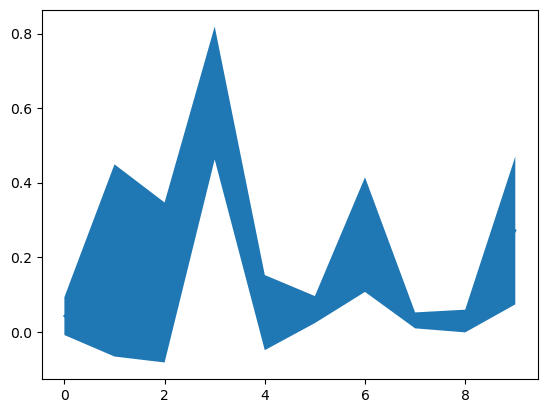

In [16]:
plt.plot(np.arange(len(regrets_to_plot)), regrets_means)
plt.fill_between(np.arange(len(regrets_to_plot)), np.array(regrets_means)-np.array(regrets_stds), np.array(regrets_means)+np.array(regrets_stds))

In [4]:
import pickle

file = open('test.pkl','wb')
obj_1 = ['test_1', {'ability', 'mobility'}]
obj_2 = ['test_2', {'ability', 'mobility'}]
obj_3 = ['test_3', {'ability', 'mobility'}]

pickle.dump(obj_1, file)
pickle.dump(obj_2, file)
pickle.dump(obj_3, file)

file.close()

file = open('test.pkl', 'rb')
obj_1 = pickle.load(file)
# obj_2 = pickle.load(file)
# obj_3 = pickle.load(file)
print(obj_1)
# print(obj_2)
# print(obj_3)
file.close()
file = open('test.pkl', 'rb')
obj_1 = pickle.load(file)
obj_2 = pickle.load(file)
print(obj_2)
file.close()

['test_1', {'ability', 'mobility'}]
['test_2', {'ability', 'mobility'}]
